Saving Car3.jpg to Car3 (1).jpg
The dominant color in the image is: White


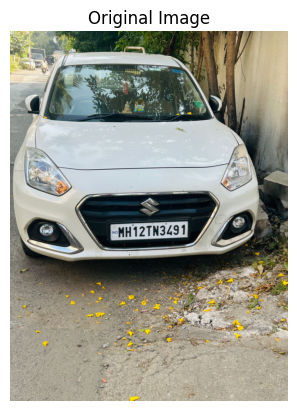

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Step 2: Load the image
image_path = list(uploaded.keys())[0]  # Get the uploaded image file name
image = cv2.imread(image_path)

# Convert the image to HSV (Hue, Saturation, Value) color space for better color detection
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Function to automatically detect the dominant color in an image
def detect_dominant_color(hsv_image):
    # Calculate the histogram of hues in the image
    hue_hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])

    # Find the hue value with the maximum occurrence
    dominant_hue = np.argmax(hue_hist)

    # Based on the dominant hue, create a mask for the most frequent color in the image
    # Define hue ranges for basic colors: Red, Green, Blue, etc.
    if 0 <= dominant_hue <= 10 or 170 <= dominant_hue <= 180:
        lower_bound = np.array([0, 100, 100])
        upper_bound = np.array([10, 255, 255])
        color = "Red"
    elif 35 <= dominant_hue <= 85:
        lower_bound = np.array([35, 100, 100])
        upper_bound = np.array([85, 255, 255])
        color = "Green"
    elif 85 <= dominant_hue <= 170:
        lower_bound = np.array([85, 100, 100])
        upper_bound = np.array([170, 255, 255])
        color = "Blue"
    elif 0 <= dominant_hue <= 10 or 170 <= dominant_hue <= 180:  # For red detection
        lower_bound = np.array([0, 0, 0])
        upper_bound = np.array([179, 255, 255])
        color = "Other"
    else:
        # Detect White: Low Saturation, High Value
        # White is detected when the saturation is low and the value is high
        lower_bound_white = np.array([0, 0, 200])
        upper_bound_white = np.array([179, 30, 255])
        white_mask = cv2.inRange(hsv_image, lower_bound_white, upper_bound_white)

        # Detect Black: Low Value
        lower_bound_black = np.array([0, 0, 0])
        upper_bound_black = np.array([179, 255, 50])
        black_mask = cv2.inRange(hsv_image, lower_bound_black, upper_bound_black)

        if np.sum(white_mask) > np.sum(black_mask):
            color = "White"
        else:
            color = "Black"

    # Return the extracted color as well
    return color

# Detect the dominant color
dominant_color = detect_dominant_color(hsv)
print(f"The dominant color in the image is: {dominant_color}")

# Step 3: Display the original image and mask for the detected color
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


In [ ]:
# Import necessary libraries
from google.colab import files
import easyocr
from IPython.display import display, HTML

# Step 1: Upload the number plate image
uploaded = files.upload()

# Get the uploaded file path
image_path = list(uploaded.keys())[0]  # Get the uploaded image file name

# Step 2: Perform number plate text extraction using EasyOCR
def extract_number_plate_text(image_path):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_path)

    # Extract the text from the result
    extracted_text = ''
    for detection in result:
        text = detection[1]
        extracted_text += text + " "

    return extracted_text.strip()

# Step 3: Extract and display number plate text
plate_text = extract_number_plate_text(image_path)
print(f"Extracted Number Plate Text: {plate_text}")

# Step 4: Display a button that redirects to the URL
button_html = '''
    <h3>Click the button below to visit the RC search page:</h3>
    <a href="https://www.carinfo.app/rc-search" target="_blank">
        <button style="background-color: #4CAF50; color: white; padding: 15px 32px; font-size: 16px; border: none; cursor: pointer;">
            Go to RC Search
        </button>
    </a>
'''
button_html1 = '''
    <h3>Click the button below to visit the Challan Identification search page:</h3>
    <a href="https://www.carinfo.app/challan-search" target="_blank">
        <button style="background-color: #4CAF50; color: white; padding: 15px 32px; font-size: 16px; border: none; cursor: pointer;">
            Go to RC Search
        </button>
    </a>
'''

# Display the button
display(HTML(button_html))
display(HTML(button_html1))

Saving Screenshot 2024-11-22 195825.png to Screenshot 2024-11-22 195825 (3).png
Extracted Number Plate Text: MH12X F5298
